<a href="https://colab.research.google.com/github/samyachauhan/brain-tumor-detection/blob/main/ML_Brain_Tumor_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load in additional libraries as needed
# SKLearn associated libraries

from skimage import color #to make greyscale
from sklearn.model_selection import train_test_split #to split training and testing
from PIL import Image #to augment images
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import requests
import time #timing models
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier

In [ ]:
# Loading in further libraries
# For advanced neural networks

import tensorflow.keras as keras
import keras.optimizers as optimizers
from keras.models import Sequential
from keras.layers import Activation, MaxPooling2D, Dropout, Flatten, Reshape, Dense, Conv2D, GlobalAveragePooling2D, BatchNormalization
from keras.layers import Dense
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint

# For transfer learning

from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.densenet import DenseNet121

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from collections import Counter
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D
from keras.layers import Activation, MaxPooling2D, Dropout, Flatten, Reshape
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Load your dataset
!wget -q --show-progress "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20%2B%20X/Group/Healthcare/Brain%20Tumor%20Detection/tumor.npy"
!wget -q --show-progress "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20%2B%20X/Group/Healthcare/Brain%20Tumor%20Detection/tumor_labels.npy"

### pre-loading all data of interest
image_data = np.load('tumor.npy')
labels = np.load('tumor_labels.npy')

tumor.npy           100%[===================>]  16.29M  95.8MB/s    in 0.2s    
tumor_labels.npy    100%[===================>]   2.10K  --.-KB/s    in 0s      


In [ ]:
print(labels)

#dimensions of label set
print(np.shape(labels))

#dimensions of image data
print(np.shape(image_data))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
(253,)
(253, 150, 150, 3)


In [ ]:
totalHealthy = 0;
totalTumor = 0;
for label in labels:
  if (label == 0):
    totalHealthy = totalHealthy + 1
  else:
    totalTumor = totalTumor + 1

print("Healthy Scans: " + str(totalHealthy))
print("Tumor Scans: " + str(totalTumor))

Healthy Scans: 98
Tumor Scans: 155


In [ ]:
print("Health Scans: " + str(sum(labels == 0)))
print("Tumor Scans: " + str(sum(labels == 1)))

Health Scans: 98
Tumor Scans: 155


Anything Else?

[0 1]


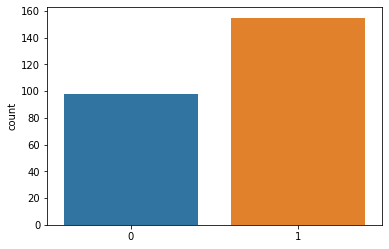

In [ ]:
#bar graph comparision of the number of brain tumor scans vs no brain tumor scans
print(np.unique(labels))
sns.countplot(x=labels)

1


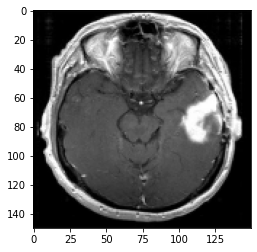

In [ ]:
print(labels[0])
plt.imshow(image_data[0])


0


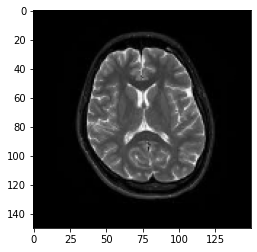

In [ ]:
print(labels[200])
plt.imshow(image_data[200])

In [ ]:
#making greyscale
grayImages = []
for image in image_data:
   grayImages.append(image[:,:,0])

In [ ]:
print(image_data[104][:][:][0])
print(image_data[104][:][:][1])
print(image_data[104][:][:][2])

[[ 99  99  99]
 [ 47  47  47]
 [ 48  48  48]
 [ 47  47  47]
 [ 47  47  47]
 [ 47  47  47]
 [ 47  47  47]
 [ 47  47  47]
 [ 47  47  47]
 [ 47  47  47]
 [ 47  47  47]
 [ 47  47  47]
 [ 47  47  47]
 [ 47  47  47]
 [ 47  47  47]
 [ 47  47  47]
 [ 47  47  47]
 [ 47  47  47]
 [ 47  47  47]
 [ 47  47  47]
 [ 47  47  47]
 [ 47  47  47]
 [ 47  47  47]
 [ 47  47  47]
 [ 47  47  47]
 [ 47  47  47]
 [ 47  47  47]
 [ 47  47  47]
 [ 47  47  47]
 [ 47  47  47]
 [ 47  47  47]
 [ 47  47  47]
 [ 47  47  47]
 [ 47  47  47]
 [ 47  47  47]
 [ 47  47  47]
 [ 47  47  47]
 [ 47  47  47]
 [ 47  47  47]
 [ 47  47  47]
 [ 47  47  47]
 [ 47  47  47]
 [ 47  47  47]
 [ 47  47  47]
 [ 47  47  47]
 [ 47  47  47]
 [ 47  47  47]
 [ 47  47  47]
 [ 47  47  47]
 [ 47  47  47]
 [ 47  47  47]
 [ 47  47  47]
 [ 47  47  47]
 [ 47  47  47]
 [ 47  47  47]
 [ 48  48  48]
 [ 48  48  48]
 [ 51  51  51]
 [ 62  62  62]
 [ 65  65  65]
 [ 71  71  71]
 [ 77  77  77]
 [ 88  88  88]
 [ 94  94  94]
 [100 100 100]
 [119 119 119]
 [113 113 

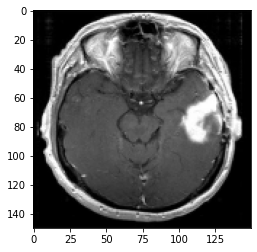

In [ ]:
imageNumber = 9;
plt.imshow(image_data[imageNumber])

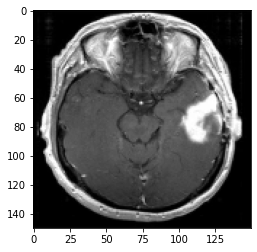

In [ ]:
plt.imshow(grayImages[imageNumber], cmap = "gray")

In [ ]:
print(np.shape(grayImages))

(253, 150, 150)


In [ ]:
def normalize_dataset (image):
  normalized = (image - np.min(image)) / (np.max(image) - np.min(image))
  return normalized

normalizedImages = []
for image in grayImages:
  image = image.flatten()
  normalizedImages.append(normalize_dataset(image)) #normalized images as gray

normalizedImages = np.array(normalizedImages) #makes into array so it can be split later

In [ ]:
#images for neural network
imagesForNN = []
for image in grayImages:
  imagesForNN.append(normalize_dataset(image))

imagesForNN = np.array(imagesForNN) #makes into array so it can be split later

Are the number of healty vs tumor the same? Does it matter?

In [ ]:
print(np.shape(normalizedImages))

(253, 22500)


In [ ]:
#split into training and testing
X_train, X_test, y_train, y_test = train_test_split(normalizedImages, labels, test_size = 0.2, random_state = 35)

In [ ]:
np.shape(X_train)

(202, 22500)

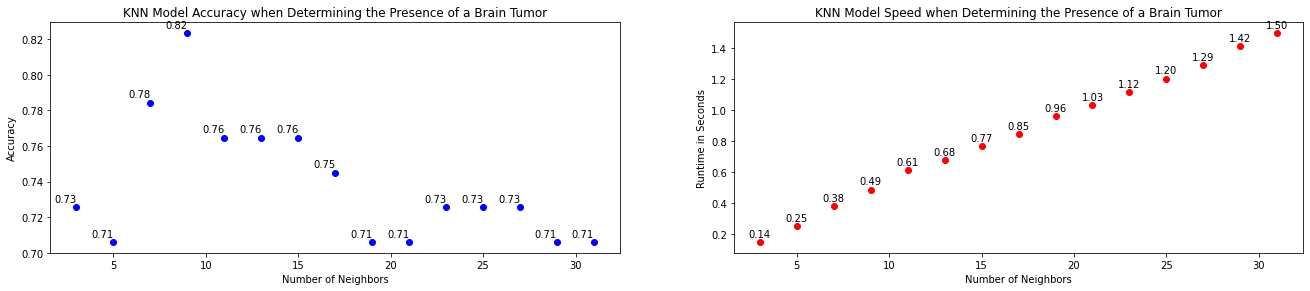

In [ ]:
#KNN
n = 3 #n = number of neighbors
tKNN = time.time() #tKNN is time it takes for model to run
accuracyListKNN = []
timeListKNN = []
neighborList = []

while n <= 31:
  knn = KNeighborsClassifier(n_neighbors = n)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  accuracyKNN = accuracy_score(y_test, y_pred)
  accuracyListKNN.append(accuracyKNN)
  elapsedKNN = time.time() - tKNN
  timeListKNN.append(elapsedKNN)
  neighborList.append(n)
  n = n + 2


#for x in range (0, len(accuracyListKNN)):
 # print("Number of Neighbors: " + str(neighborList[int(x)]))
  #print("Accuracy: " + str(accuracyListKNN[int(x)]))
  #print("Time: " + str(timeListKNN[int(x)]) + " seconds")
  #print()

plt.subplot(1, 2, 1)
plt.scatter(neighborList, accuracyListKNN, color = "blue")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.title("KNN Model Accuracy when Determining the Presence of a Brain Tumor")
for x,y in zip(neighborList,accuracyListKNN):

    label = "{:.2f}".format(y)

    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,5),
                 ha='right')

plt.subplot(1, 2, 2)
plt.scatter(neighborList, timeListKNN, color = "red")
plt.xlabel("Number of Neighbors")
plt.ylabel("Runtime in Seconds")
plt.title("KNN Model Speed when Determining the Presence of a Brain Tumor")
for x,y in zip(neighborList,timeListKNN):

    label = "{:.2f}".format(y)

    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,5),
                 ha='center')

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=3,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.4)

Number of Neighbors: 3
Random State: 35
Accuracy: 0.7254901960784313
Time: 0.09643030166625977 seconds

Number of Neighbors: 3
Random State: 65
Accuracy: 0.8431372549019608
Time: 0.1979689598083496 seconds

Number of Neighbors: 3
Random State: 95
Accuracy: 0.8431372549019608
Time: 0.31832242012023926 seconds

Number of Neighbors: 3
Random State: 125
Accuracy: 0.7450980392156863
Time: 0.44191908836364746 seconds

Number of Neighbors: 3
Random State: 155
Accuracy: 0.7450980392156863
Time: 0.5346426963806152 seconds

Number of Neighbors: 3
Random State: 185
Accuracy: 0.7254901960784313
Time: 0.6383419036865234 seconds

Number of Neighbors: 5
Random State: 35
Accuracy: 0.7058823529411765
Time: 0.7607147693634033 seconds

Number of Neighbors: 5
Random State: 65
Accuracy: 0.8235294117647058
Time: 0.890662670135498 seconds

Number of Neighbors: 5
Random State: 95
Accuracy: 0.8235294117647058
Time: 1.0872399806976318 seconds

Number of Neighbors: 5
Random State: 125
Accuracy: 0.764705882352941

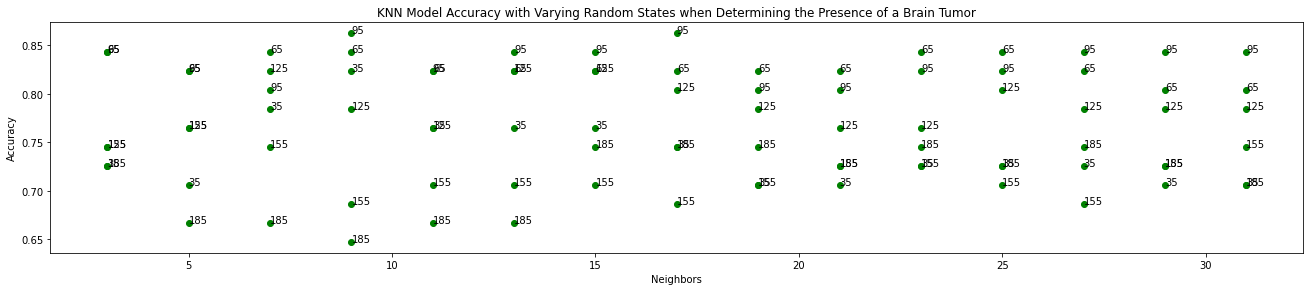

In [ ]:
n = 3 #n = number of neighbors
tKNN = time.time() #tKNN is time it takes for model to run
accuracyListKNN = []
timeListKNN = []
neighborList = []
randomStateList = []
initialRandomState = 35
r = initialRandomState

numberOfRandomStates = 5
while n <= 31:
  for y in range (numberOfRandomStates + 1):
    Xknn_train, Xknn_test, yknn_train, yknn_test = train_test_split(normalizedImages, labels, test_size = 0.2, random_state = r)
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(Xknn_train, yknn_train)
    yknn_pred = knn.predict(Xknn_test)
    accuracyKNN = accuracy_score(yknn_test, yknn_pred)
    accuracyListKNN.append(accuracyKNN)
    elapsedKNN = time.time() - tKNN
    timeListKNN.append(elapsedKNN)
    neighborList.append(n)
    randomStateList.append(r)
    r = r + 30
  r = initialRandomState
  n = n + 2

for x in range (0, len(accuracyListKNN)):
  print("Number of Neighbors: " + str(neighborList[int(x)]))
  print("Random State: " + str(randomStateList[int(x)]))
  print("Accuracy: " + str(accuracyListKNN[int(x)]))
  print("Time: " + str(timeListKNN[int(x)]) + " seconds")
  print()

plt.scatter(neighborList, accuracyListKNN, color = "green")
plt.xlabel("Neighbors")
plt.ylabel("Accuracy")
plt.title("KNN Model Accuracy with Varying Random States when Determining the Presence of a Brain Tumor")


for i, txt in enumerate(randomStateList):
    plt.annotate(txt, (neighborList[i], accuracyListKNN[i]))

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=3,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.4)

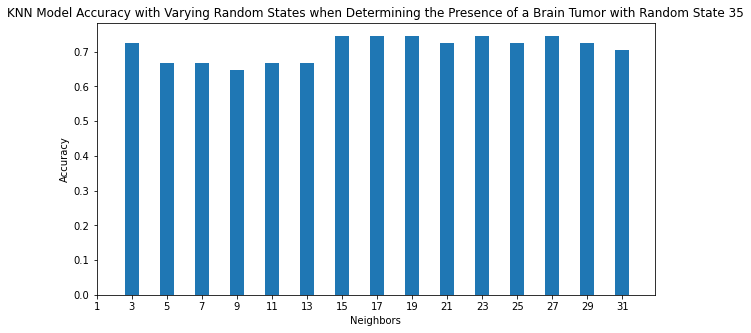

In [ ]:
##
n = 3 #n = number of neighbors
tKNN = time.time() #tKNN is time it takes for model to run
accuracyListKNN = []
timeListKNN = []
neighborList = [3,5,7,9,11,13,15,17,19,21,23,25,27,29,31]
randomStateList1 = []
randomStateList2 = []
randomStateList3 = []
randomStateList4 = []
randomStateList5 = []
initialRandomState = 35
r = initialRandomState
randomStateIncrement = 20

def modelAddIncrement():
  knn = KNeighborsClassifier(n_neighbors = r + randomStateIncrement)
  knn.fit(Xknn_train, yknn_train)
  yknn_pred = knn.predict(Xknn_test)
  accuracyKNN = accuracy_score(yknn_test, yknn_pred)
  accuracyListKNN.append(accuracyKNN)
  elapsedKNN = time.time() - tKNN
  timeListKNN.append(elapsedKNN)

numb = 1
while n <= 31:
  for y in range (0,5):
    if numb == 1:
      knn = KNeighborsClassifier(n_neighbors = n)
      knn.fit(Xknn_train, yknn_train)
      yknn_pred = knn.predict(Xknn_test)
      accuracyKNN = accuracy_score(yknn_test, yknn_pred)
      accuracyListKNN.append(accuracyKNN)
      elapsedKNN = time.time() - tKNN
      timeListKNN.append(elapsedKNN)
      randomStateList1.append(accuracyKNN)
      numb = 2
    if numb == 2:
      knn = KNeighborsClassifier(n_neighbors = r + randomStateIncrement)
      knn.fit(Xknn_train, yknn_train)
      yknn_pred = knn.predict(Xknn_test)
      accuracyKNN = accuracy_score(yknn_test, yknn_pred)
      accuracyListKNN.append(accuracyKNN)
      elapsedKNN = time.time() - tKNN
      timeListKNN.append(elapsedKNN)
      randomStateList2.append(accuracyKNN)
      numb = 3
    if numb == 3:
      knn = KNeighborsClassifier(n_neighbors = r + randomStateIncrement)
      knn.fit(Xknn_train, yknn_train)
      yknn_pred = knn.predict(Xknn_test)
      accuracyKNN = accuracy_score(yknn_test, yknn_pred)
      accuracyListKNN.append(accuracyKNN)
      elapsedKNN = time.time() - tKNN
      timeListKNN.append(elapsedKNN)
      randomStateList3.append(accuracyKNN)
      numb = 4
    if numb == 4:
      knn = KNeighborsClassifier(n_neighbors = r + randomStateIncrement)
      knn.fit(Xknn_train, yknn_train)
      yknn_pred = knn.predict(Xknn_test)
      accuracyKNN = accuracy_score(yknn_test, yknn_pred)
      accuracyListKNN.append(accuracyKNN)
      elapsedKNN = time.time() - tKNN
      timeListKNN.append(elapsedKNN)
      randomStateList4.append(accuracyKNN)
      numb = 5
    if numb == 5:
      knn = KNeighborsClassifier(n_neighbors = r + randomStateIncrement)
      knn.fit(Xknn_train, yknn_train)
      yknn_pred = knn.predict(Xknn_test)
      accuracyKNN = accuracy_score(yknn_test, yknn_pred)
      accuracyListKNN.append(accuracyKNN)
      elapsedKNN = time.time() - tKNN
      timeListKNN.append(elapsedKNN)
      randomStateList5.append(accuracyKNN)
      n = n + 2
      numb = 1
  r = initialRandomState

barWidth = 0.2

X = np.arange(15)
fig = plt.figure(figsize = (10, 5))


ind = np.arange(15)
r = np.arange(15)

plt.bar(neighborList,randomStateList1)
plt.xticks(np.arange(min(neighborList)-2, max(neighborList)+1, 2))

plt.xlabel("Neighbors")
plt.ylabel("Accuracy")
plt.title("KNN Model Accuracy with Varying Random States when Determining the Presence of a Brain Tumor with Random State 35")
plt.show()


Number of Branches: 2
Accuracy: 0.7647058823529411
Time: 0.932504415512085 seconds

Number of Branches: 3
Accuracy: 0.7058823529411765
Time: 2.16267991065979 seconds

Number of Branches: 4
Accuracy: 0.6470588235294118
Time: 3.664900064468384 seconds

Number of Branches: 5
Accuracy: 0.7058823529411765
Time: 5.4150471687316895 seconds

Number of Branches: 6
Accuracy: 0.6274509803921569
Time: 7.404094696044922 seconds

Number of Branches: 7
Accuracy: 0.6666666666666666
Time: 9.62403678894043 seconds

Number of Branches: 8
Accuracy: 0.6862745098039216
Time: 11.838260650634766 seconds

Number of Branches: 9
Accuracy: 0.6666666666666666
Time: 14.079927206039429 seconds

Number of Branches: 10
Accuracy: 0.6666666666666666
Time: 16.33643913269043 seconds

Number of Branches: 11
Accuracy: 0.6862745098039216
Time: 18.56571054458618 seconds

Number of Branches: 12
Accuracy: 0.6862745098039216
Time: 20.787991762161255 seconds

Number of Branches: 13
Accuracy: 0.7254901960784313
Time: 23.0044324398

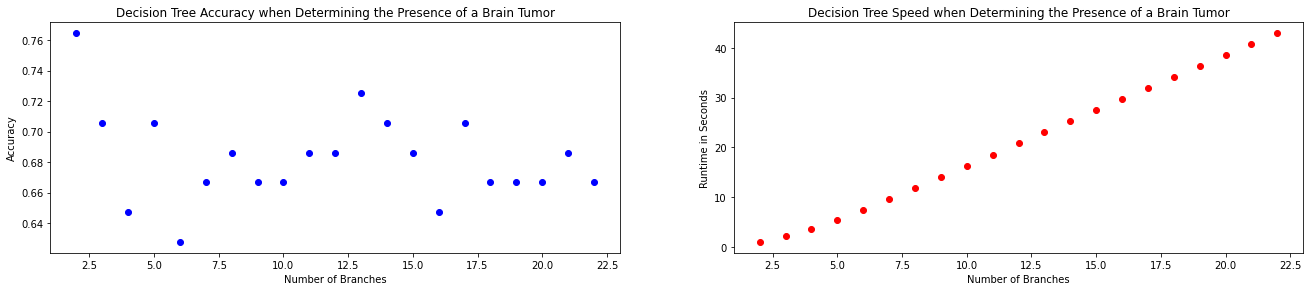

In [ ]:
#Decision Tree
b = 2 #b = number of branches
tDT = time.time() #tDT is time it takes for model to run
accuracyListDT = []
timeListDT = []
branchList = []

while b <= 22:
  dt = DecisionTreeClassifier(max_depth = b)
  dt.fit(X_train, y_train)
  y_pred = dt.predict(X_test)
  accuracyDT = accuracy_score(y_test, y_pred)
  accuracyListDT.append(accuracyDT)
  elapsedDT = time.time() - tDT
  timeListDT.append(elapsedDT)
  branchList.append(b)
  b = b + 1

for x in range (0, len(accuracyListDT)):
  print("Number of Branches: " + str(branchList[int(x)]))
  print("Accuracy: " + str(accuracyListDT[int(x)]))
  print("Time: " + str(timeListDT[int(x)]) + " seconds")
  print()

plt.subplot(1, 2, 1)
plt.scatter(branchList, accuracyListDT, color = "blue")
plt.xlabel("Number of Branches")
plt.ylabel("Accuracy")
plt.title("Decision Tree Accuracy when Determining the Presence of a Brain Tumor")

plt.subplot(1, 2, 2)
plt.scatter(branchList, timeListDT, color = "red")
plt.xlabel("Number of Branches")
plt.ylabel("Runtime in Seconds")
plt.title("Decision Tree Speed when Determining the Presence of a Brain Tumor")

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=3,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.4)

In [ ]:
XNN_train, XNN_test, yNN_train, yNN_test = train_test_split(normalizedImages, labels, test_size = 0.2, random_state = 35)

In [ ]:
nnet = MLPClassifier(hidden_layer_sizes=(3), random_state=1, max_iter=100000) #neural network with 1 hidden layer of 3 neurons
nnet.fit(XNN_train, yNN_train)
predictions = nnet.predict(XNN_test)
print("MLP Testing Set Score:")
print(accuracy_score(yNN_test, predictions)*100)

MLP Testing Set Score:
78.43137254901961


In [ ]:
nnet = MLPClassifier(hidden_layer_sizes=(3, 4), random_state=1, max_iter=100000) #neural network with 2 hidden layers (3 neurons and 4 neurons)
nnet.fit(XNN_train, yNN_train)
predictions = nnet.predict(XNN_test)
print("MLP Testing Set Score:")
print(accuracy_score(yNN_test, predictions)*100)

MLP Testing Set Score:
70.58823529411765
